In [1]:
import pandas as pd

data = pd.read_csv("data/eicu.csv")
data.head()

,age,gender,ethnicity,mort_icu,n_measurements,min_lactate_24_hr,max_lactate_24_hr,avg_lactate_24_hr,m_3,m_4,std_lactate_24_hr
0,58,F,black,0,37,0.88,9.38,6.190270,303.788722,2227.189318,2.040127
1,71,M,black,1,33,0.00,18.79,6.937576,1670.853132,27320.631158,7.565798
2,42,M,white,0,31,0.00,16.32,7.414839,992.753641,13199.674527,5.061313
3,47,M,white,1,31,0.60,13.09,7.352258,677.882444,7155.128642,3.682188
4,45,M,white,0,30,0.00,12.80,2.483333,213.572033,2293.859323,3.891194


In [2]:
data[["mort_icu", "n_measurements", "max_lactate_24_hr", "ethnicity"]].corr(method='pearson')

,mort_icu,n_measurements,max_lactate_24_hr
mort_icu,1.000000,0.091544,0.371091
n_measurements,0.091544,1.000000,0.330461
max_lactate_24_hr,0.371091,0.330461,1.000000


In [4]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(data)
categorical_features

['gender', 'ethnicity']

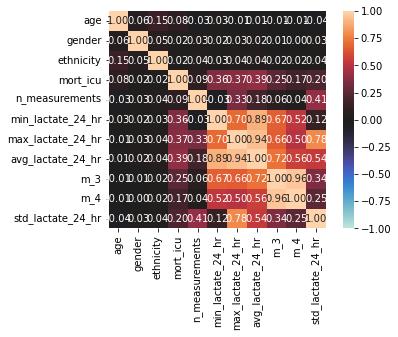

{'corr':                         age    gender  ethnicity  mort_icu  n_measurements  \
 age                1.000000  0.055424   0.147734  0.080849       -0.027530   
 gender             0.055424  1.000000   0.050116  0.021238        0.033013   
 ethnicity          0.147734  0.050116   1.000000  0.018323        0.039900   
 mort_icu           0.080849  0.021238   0.018323  1.000000        0.091544   
 n_measurements    -0.027530  0.033013   0.039900  0.091544        1.000000   
 min_lactate_24_hr  0.031730  0.017081   0.034465  0.356049       -0.032982   
 max_lactate_24_hr -0.008882  0.029539   0.043005  0.371091        0.330461   
 avg_lactate_24_hr  0.010716  0.024756   0.040806  0.394122        0.176257   
 m_3               -0.010923  0.005618   0.021547  0.247109        0.064854   
 m_4               -0.011182  0.003112   0.016772  0.169753        0.037319   
 std_lactate_24_hr -0.039452  0.029905   0.036290  0.203487        0.405380   
 
                    min_lactate_24_hr  max

In [5]:
from dython.nominal import associations
associations(data, nominal_columns='auto')

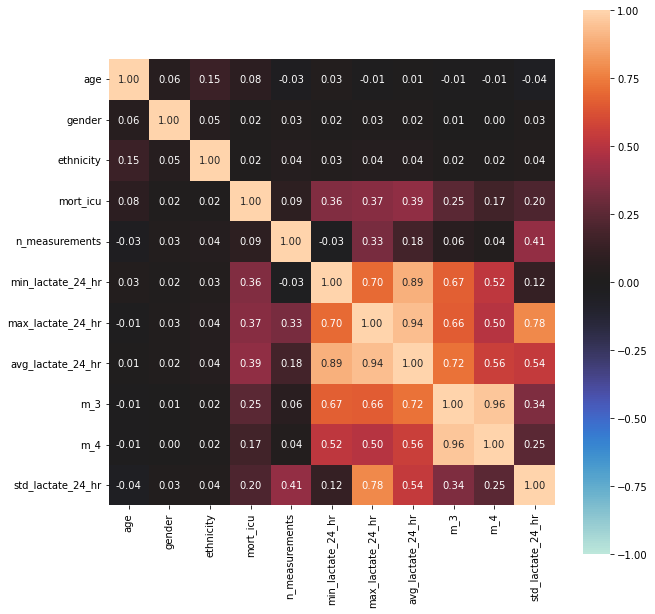

In [6]:
complete_correlation= associations(data, filename= 'complete_correlation.png', figsize=(10,10))

In [7]:
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

/var/folders/m8/sb3p17zj07s4h28sd6njtsbw0000gn/T/ipykernel_6900/1661098780.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,age,gender,ethnicity,mort_icu,n_measurements,min_lactate_24_hr,max_lactate_24_hr,avg_lactate_24_hr,m_3,m_4,std_lactate_24_hr
age,1.00,0.06,0.15,0.08,-0.03,0.03,-0.01,0.01,-0.01,-0.01,-0.04
gender,0.06,1.00,0.05,0.02,0.03,0.02,0.03,0.02,0.01,0.00,0.03
ethnicity,0.15,0.05,1.00,0.02,0.04,0.03,0.04,0.04,0.02,0.02,0.04
mort_icu,0.08,0.02,0.02,1.00,0.09,0.36,0.37,0.39,0.25,0.17,0.20
n_measurements,-0.03,0.03,0.04,0.09,1.00,-0.03,0.33,0.18,0.06,0.04,0.41
min_lactate_24_hr,0.03,0.02,0.03,0.36,-0.03,1.00,0.70,0.89,0.67,0.52,0.12
max_lactate_24_hr,-0.01,0.03,0.04,0.37,0.33,0.70,1.00,0.94,0.66,0.50,0.78
avg_lactate_24_hr,0.01,0.02,0.04,0.39,0.18,0.89,0.94,1.00,0.72,0.56,0.54
m_3,-0.01,0.01,0.02,0.25,0.06,0.67,0.66,0.72,1.00,0.96,0.34
m_4,-0.01,0.00,0.02,0.17,0.04,0.52,0.50,0.56,0.96,1.00,0.25


Text(0.5, 1.0, 'Distribution of avg of serum lactate, 24 hours window')

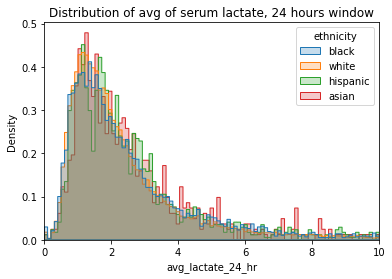

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

data_sliced = data[data.ethnicity.isin(["black", "white", "hispanic", "asian"]) ]
sns.histplot(
    data_sliced, x="avg_lactate_24_hr", hue="ethnicity", element="step",
    stat="density", common_norm=False,
)
plt.xlim([0,10])
plt.title("Distribution of avg of serum lactate, 24 hours window")
#max_lactate_24_hr
#min_lactate_24_hr

In [ ]:
#Kolmogorov-Smirnov statistical test: 

from scipy import stats

In [12]:
pd.read_csv("data/full_ethnicities.csv")

,patientUnitStayID,lactate_24_hr,ethnicity
0,3155970,2.40,white
1,3155970,7.40,white
2,3155970,6.00,white
3,3151395,17.00,white
4,3151395,15.00,white
...,...,...,...
66985,3022494,6.32,black
66986,3022494,2.67,black
66987,3024410,2.51,white
66988,3024410,1.99,white


Text(0.5, 1.0, 'Distribution of serum lactate, 24 hours window')

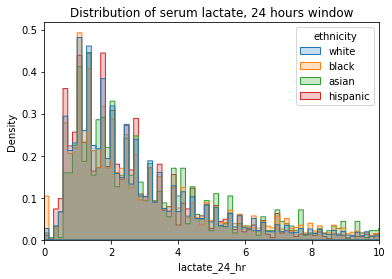

In [14]:
data_full = pd.read_csv("data/full_ethnicities.csv")
data_full_sliced = data_full[data_full.ethnicity.isin(["black", "white", "hispanic", "asian"]) ]
sns.histplot(
    data_full_sliced, x="lactate_24_hr", hue="ethnicity", element="step",
    stat="density", common_norm=False,
)
plt.xlim([0,10])
plt.title("Distribution of serum lactate, 24 hours window")

(1.0, 10.0)

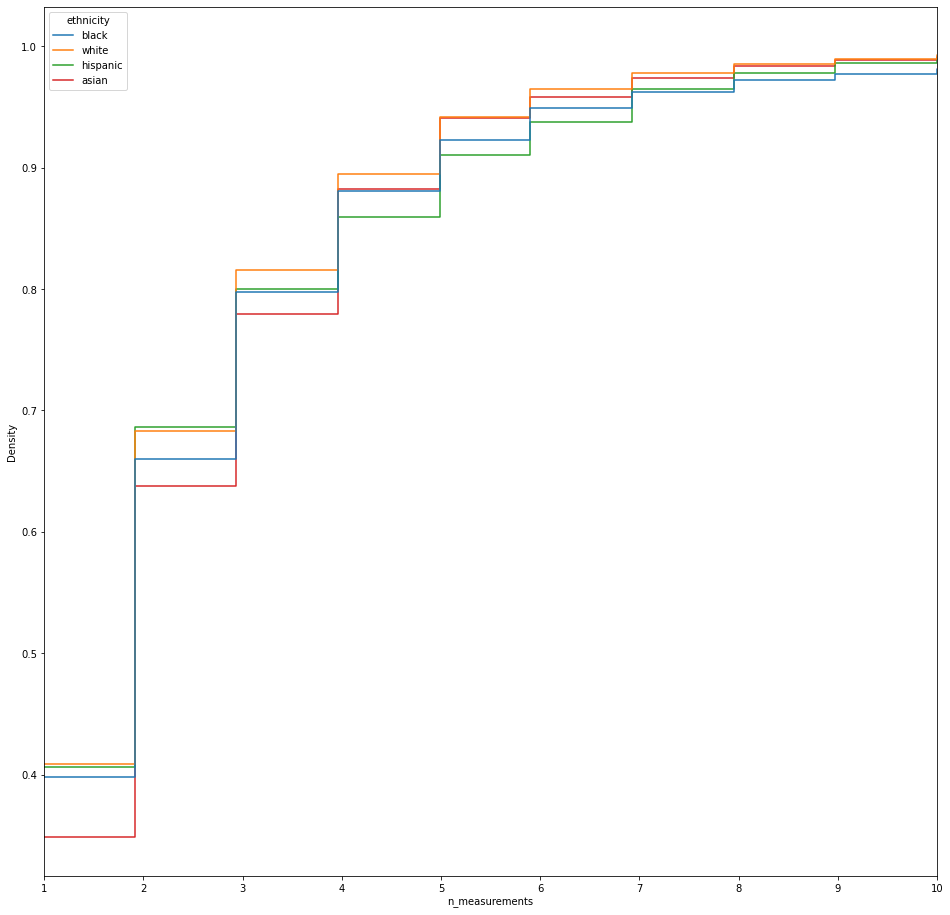

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 16))
sns.histplot(
    data=data[(data.ethnicity != "unknown") & (data.ethnicity != "other")],
    x="n_measurements",
    hue="ethnicity",
    element="step",
    fill=False,
    cumulative=True,
    stat="density",
    common_norm=False,
    #log_scale=True,
)

plt.xlim([1,10])

In [50]:
df_x, df_y = data.drop(["ethnicity"], axis=1), data[["ethnicity"]]
index = ~df_x.isna().any(axis=1)

df_x_ml, df_y_ml =  df_x[index].replace({"M": 0, "F": 1, "unknown": 0}), df_y[index]


In [51]:
import tensorflow as tf

class_names = df_y_ml.ethnicity.unique()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(len(df_y_ml.ethnicity.unique()))
])

In [52]:
df_y_ml = df_y_ml.replace({eth: k for k, eth in enumerate(df_y.ethnicity.unique())})

In [53]:
{eth: k for k, eth in enumerate(df_y.ethnicity.unique())}

{'white': 0, 'unknown': 1, 'other': 2, 'asian': 3, 'black': 4, 'hispanic': 5}

In [55]:
MAX_EPOCHS = 20
from sklearn.model_selection import train_test_split

import tensorflow as tf

list_drop = []


X, X_test, y, y_test = train_test_split(
    df_x_ml.drop(list_drop, axis=1), df_y_ml, test_size=0.3, shuffle=True
)


def compile_and_fit(model, x_train, y_train, x_val, y_val, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=patience, mode="min"
    )

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy'],
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=64,
        validation_data=(x_val, y_val),
        epochs=MAX_EPOCHS,
        callbacks=[early_stopping],
    )
    return history


linear = tf.keras.Sequential([tf.keras.layers.Dense(units=1)])
history = compile_and_fit(model, X, y, X_test, y_test)

Epoch 1/20
591/591 [==============================] - 3s 4ms/step - loss: 92.1231 - accuracy: 0.6769 - val_loss: 27.4766 - val_accuracy: 0.7071
Epoch 2/20
591/591 [==============================] - 2s 3ms/step - loss: 16.7971 - accuracy: 0.7033 - val_loss: 10.3578 - val_accuracy: 0.7101
Epoch 3/20
591/591 [==============================] - 2s 4ms/step - loss: 9.7650 - accuracy: 0.7097 - val_loss: 5.3138 - val_accuracy: 0.7058
Epoch 4/20
591/591 [==============================] - 2s 3ms/step - loss: 6.5471 - accuracy: 0.7167 - val_loss: 6.1772 - val_accuracy: 0.7411
Epoch 5/20
591/591 [==============================] - 4s 7ms/step - loss: 8.2370 - accuracy: 0.7200 - val_loss: 51.5947 - val_accuracy: 0.6507


In [57]:
# compute SHAP values
import shap
explainer = shap.DeepExplainer(model, X)
shap_values = explainer.shap_values(X_test)

ImportError: cannot import name 'DistanceMetric' from 'sklearn.metrics' (/Users/arnaudpetit/mambaforge/lib/python3.9/site-packages/sklearn/metrics/__init__.py)